In [1]:
!pip install Ipython
!pip install pyforest
!pip install xgboost

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [3]:
import pyforest
lazy_imports()

['import pickle',
 'import keras',
 'from sklearn.preprocessing import OneHotEncoder',
 'import dash',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import plotly as py',
 'import pandas as pd',
 'import sklearn',
 'from sklearn import svm',
 'import bokeh',
 'import awswrangler as wr',
 'from dask import dataframe as dd',
 'import datetime as dt',
 'import matplotlib.pyplot as plt',
 'import spacy',
 'import seaborn as sns',
 'import plotly.express as px',
 'from sklearn.manifold import TSNE',
 'from sklearn.model_selection import train_test_split',
 'import tqdm',
 'from openpyxl import load_workbook',
 'import numpy as np',
 'import os',
 'import altair as alt',
 'import re',
 'import glob',
 'import matplotlib as mpl',
 'import tensorflow as tf',
 'from sklearn.ensemble import RandomForestRegressor',
 'from pyspark import SparkContext',
 'import xgboost as xgb',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import gensim',
 'import nltk',
 'import sys

In [4]:
data=pd.read_csv('health care diabetes.csv')

<IPython.core.display.Javascript object>

In [5]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
pd.set_option('display.max_rows', None)

<IPython.core.display.Javascript object>

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Project Task: Week 1
Data Exploration:

1.Perform descriptive analysis. Understand the variables and their corresponding values. 
On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose
• BloodPressure
• SkinThickness
• Insulin
• BMI

2.Visually explore these variables using histograms. Treat the missing values accordingly.

3.There are integer and float data type variables in this dataset.
Create a count (frequency) plot describing the data types and the count of variables. 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

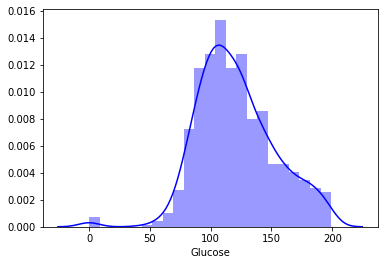

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

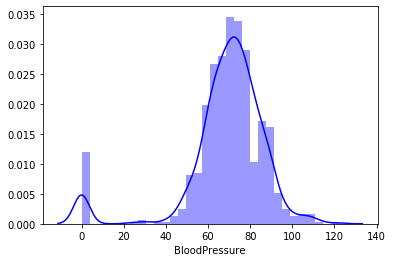

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

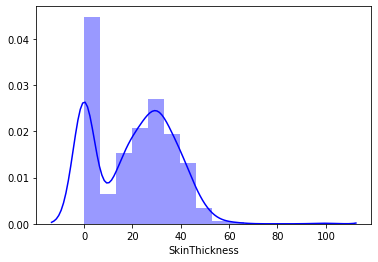

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

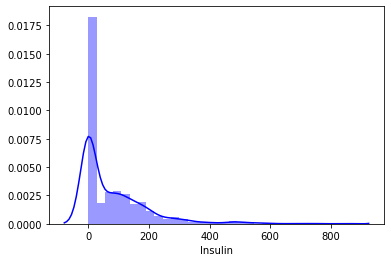

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

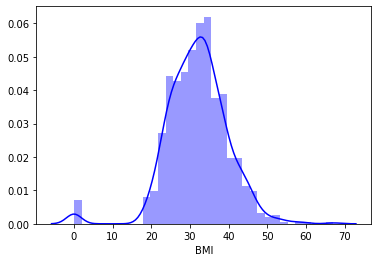

In [9]:
features =['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for f in features:
    sns.distplot(data[f], color='blue')
    plt.show()

Replacing all zero values in those 5 columns with the corresponding medians

In [10]:
features =['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for f in features:
    data[f].replace(0, np.nan, inplace=True)
    data[f].replace(np.nan, data[f].median(), inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
features =['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
for f in features:
    data[f]=data[f].astype(int)

In [12]:
data.to_csv("updated data.csv")

In [13]:
data.describe() #all zeros replaced with median values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int32  
 2   BloodPressure             768 non-null    int32  
 3   SkinThickness             768 non-null    int32  
 4   Insulin                   768 non-null    int32  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int32(4), int64(3)
memory usage: 42.1 KB


In [15]:
features =['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [16]:
for f in features:
    ints = 0
    floats = 0
    for i in data[f]:
        if isinstance(i, int):
            ints += 1
        else:
            floats += 1    
    print('For column: ', f, 'no of ints :', ints, ', no of floats : ', floats) 

For column:  Glucose no of ints : 768 , no of floats :  0
For column:  BloodPressure no of ints : 768 , no of floats :  0
For column:  SkinThickness no of ints : 768 , no of floats :  0
For column:  Insulin no of ints : 768 , no of floats :  0
For column:  BMI no of ints : 0 , no of floats :  768


# Project Task: Week 2
Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

Text(0.5, 1.0, 'Diabetes Outcome')

<IPython.core.display.Javascript object>

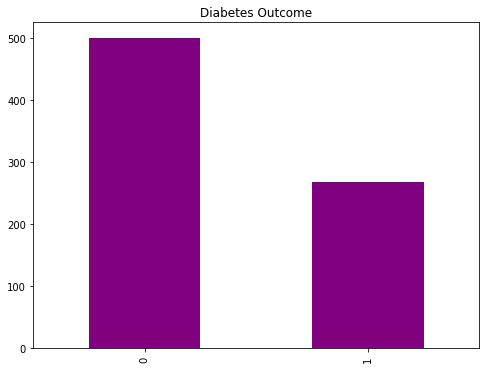

In [18]:
data['Outcome'].value_counts().plot(kind="bar", color='purple', figsize=(8,6)).set_title('Diabetes Outcome')
plt.show()

In [19]:
data.Outcome.value_counts()[1] / data.Outcome.count()

0.3489583333333333

approximately 35% of the people have diabetes

<IPython.core.display.Javascript object>

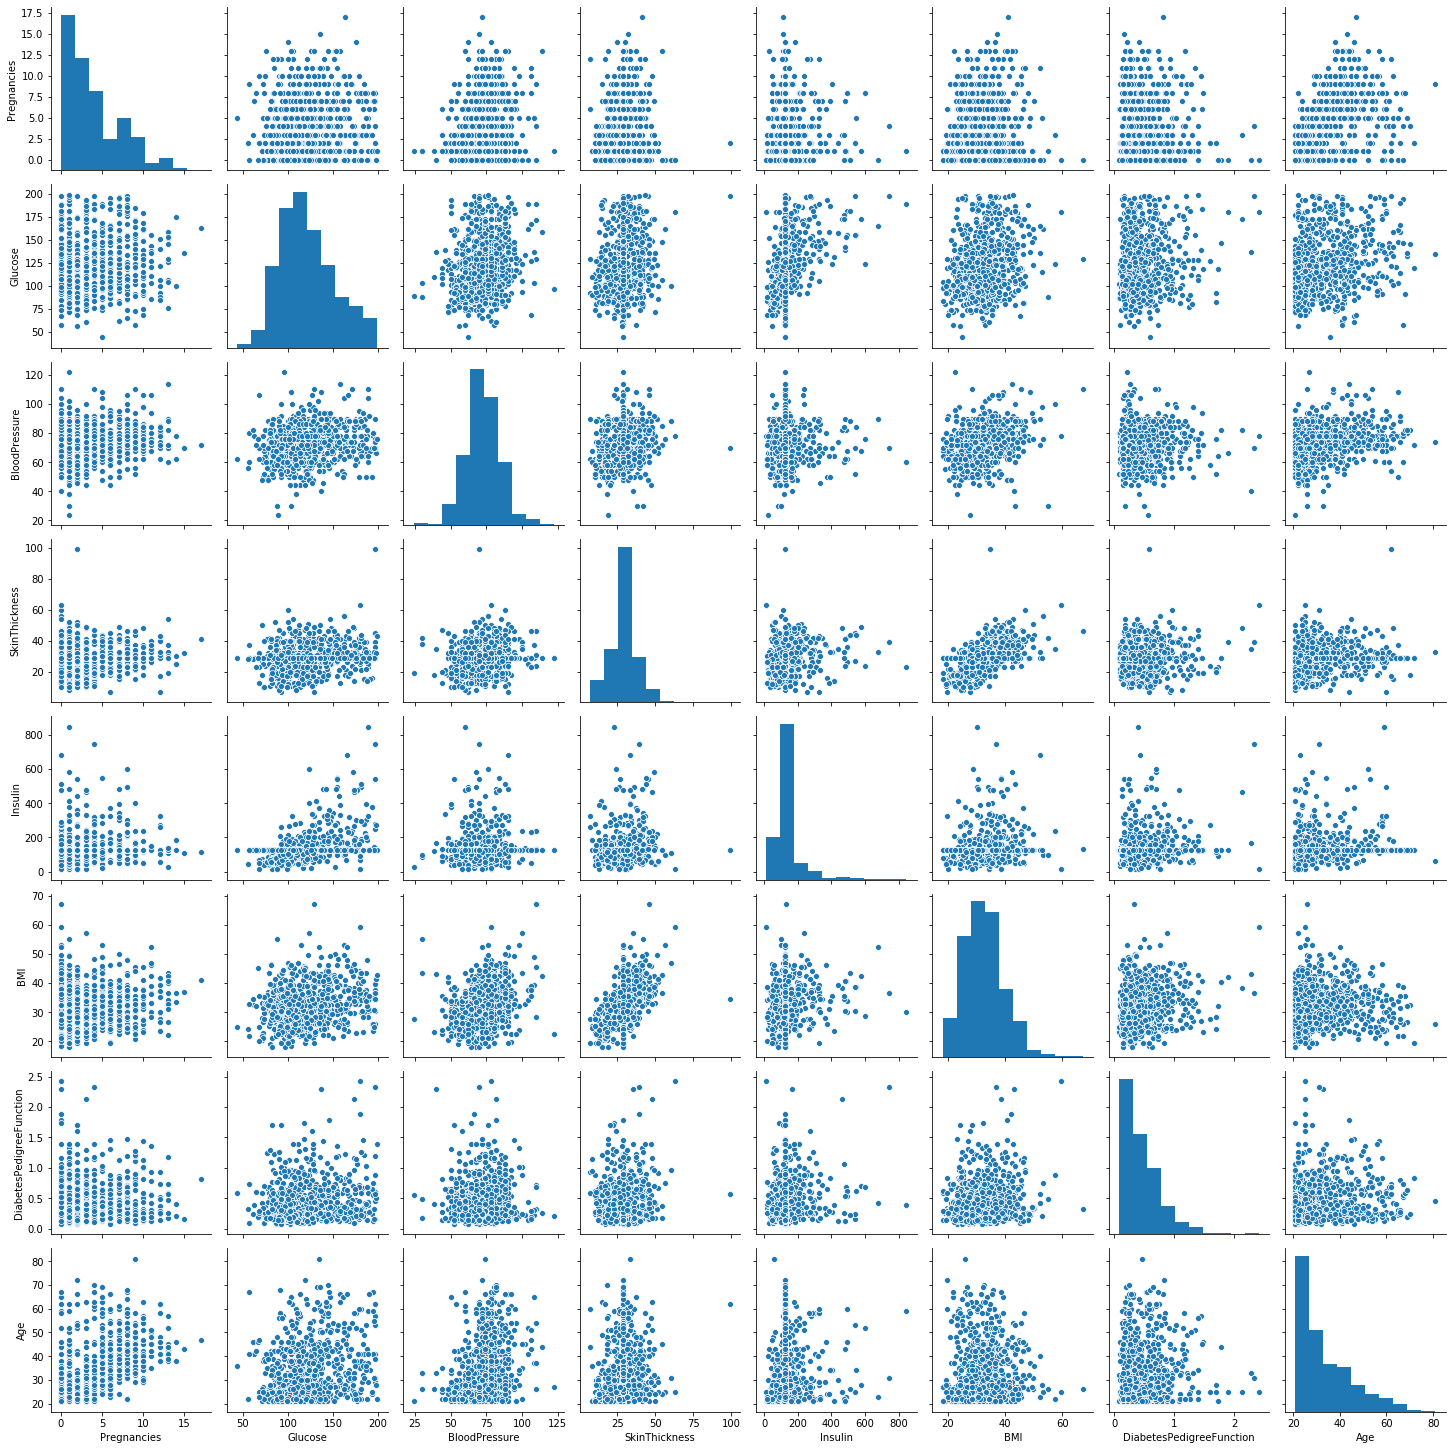

In [20]:
sns.pairplot(data.drop('Outcome', axis=1))

In [22]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

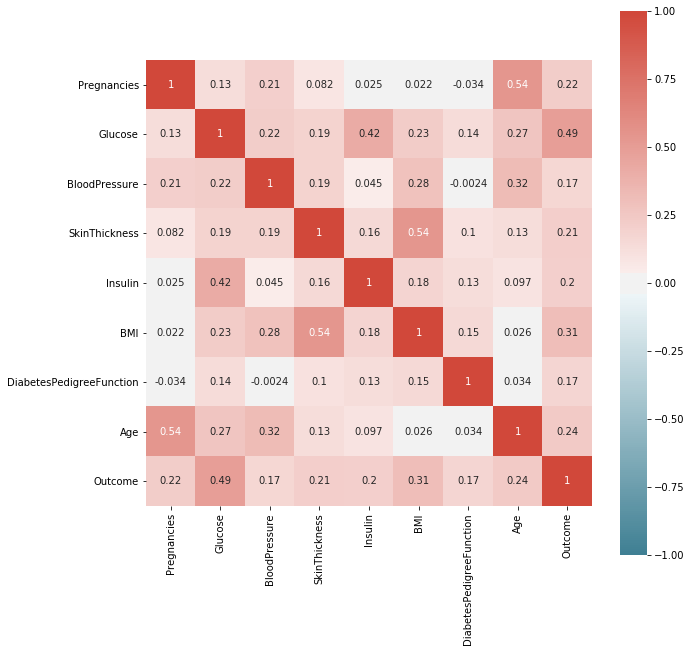

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 15, as_cmap=True)
sns.heatmap(data.corr(), annot=True, square=True, cmap=cmap, vmin=-1, vmax=1, ax=ax)

Findings:
    There is a somewhat linear relationship between SkinThickness and BMI, Insulin and Glucose and Age and Pregnancies. Other features are not related strongly with each other so there is no multicollinearity

<IPython.core.display.Javascript object>

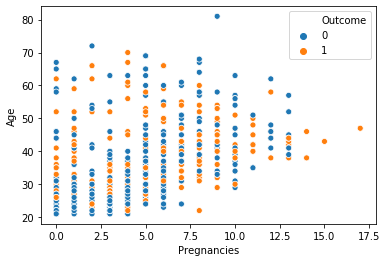

In [24]:
sns.scatterplot(data=data, x='Pregnancies', y='Age', hue='Outcome')

<IPython.core.display.Javascript object>

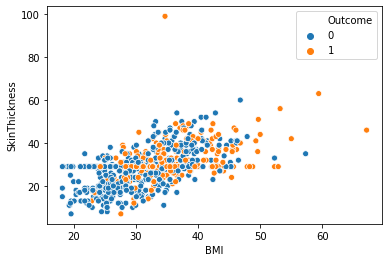

In [25]:
sns.scatterplot(data=data, x='BMI', y='SkinThickness', hue='Outcome')

<IPython.core.display.Javascript object>

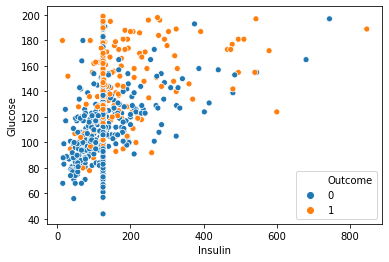

In [26]:
sns.scatterplot(data=data, x='Insulin', y='Glucose', hue='Outcome')

# Project Task: Week 3
Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

# Project Task: Week 4

Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

In [27]:
X= data.drop('Outcome', axis=1)
y= data['Outcome']
X.shape
y.shape

(768, 8)

(768,)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Top Features')

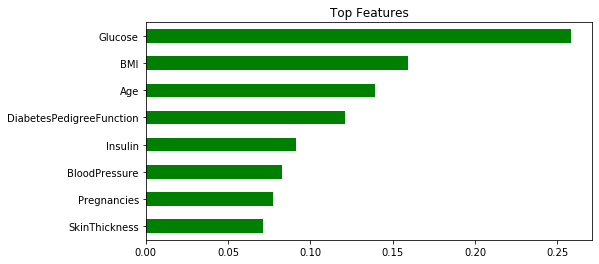

In [28]:
# To look for top features using Random Forest
rfc = RandomForestClassifier(random_state=101, n_estimators=100)
rfc = rfc.fit(X, y)
(pd.Series(rfc.feature_importances_, index=X.columns).nlargest(10).plot(kind='barh', figsize=[8,4], color='green')
 .invert_yaxis())
plt.title('Top Features')

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=101, stratify=y)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (614, 8)
y_train (614,)
X_test (154, 8)
y_test (154,)


In [30]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve

In [31]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

In [32]:
# to give model baseline report in dataframe 
def baseline_report(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    accuracy     = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy'))
    precision    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='precision'))
    recall       = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='recall'))
    f1score      = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='f1'))
    rocauc       = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc'))
    y_pred = model.predict(X_test)
    logloss      = log_loss(y_test, y_pred) 

    df = pd.DataFrame({'model'        : [name],
                       'accuracy'     : [accuracy],
                        'precision'    : [precision],
                        'recall'       : [recall],
                        'f1score'      : [f1score],
                        'rocauc'       : [rocauc],
                        'logloss'      : [logloss]
                      })
    return df

In [33]:
# to evaluate baseline models
knn = KNeighborsClassifier()
gnb = GaussianNB()
logit = LogisticRegression()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
svc = SVC()
ada = AdaBoostClassifier()
gbm = GradientBoostingClassifier()
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,n_jobs=-1)

In [34]:
df = pd.concat([baseline_report(knn, X_train, X_test, y_train, y_test, 'KNN'),
                       baseline_report(gnb, X_train, X_test, y_train, y_test, 'GaussianNB'),
                       baseline_report(logit, X_train, X_test, y_train, y_test, 'LogisticRegression'),
                       baseline_report(decisiontree, X_train, X_test, y_train, y_test, 'DecisionTree'),
                       baseline_report(randomforest, X_train, X_test, y_train, y_test, 'RandomForest'),
                       baseline_report(svc, X_train, X_test, y_train, y_test, 'SVC'),
                       baseline_report(ada, X_train, X_test, y_train, y_test, 'Adaboost'),
                       baseline_report(gbm, X_train, X_test, y_train, y_test, 'Gradient boosting'),
                       baseline_report(xgb_clf, X_train, X_test, y_train, y_test, 'xgboost')], axis=0).reset_index()
df = df.drop('index', axis=1)
df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,model,accuracy,precision,recall,f1score,rocauc,logloss
0,KNN,0.718166,0.603759,0.574529,0.586286,0.772490,9.644022
1,GaussianNB,0.749234,0.650564,0.607530,0.627894,0.822402,9.419749
2,LogisticRegression,0.765520,0.707557,0.569989,0.628492,0.830538,8.746885
3,DecisionTree,0.685566,0.538851,0.517940,0.532945,0.640862,9.419744
4,RandomForest,0.755684,0.672615,0.588483,0.609090,0.827127,8.746890
5,SVC,0.750886,0.698966,0.509635,0.587649,0.825565,9.419723
6,Adaboost,0.723124,0.621133,0.541860,0.577985,0.781468,7.401229
7,Gradient boosting,0.752486,0.669052,0.593245,0.626509,0.829654,7.849779
8,xgboost,0.737785,0.628258,0.621373,0.623215,0.793607,9.419744


We will focus on recall to minimize type 2 error as there shouldn't be any false negatives, i.e a person having diabetes should not be classified as not having diabetes.

In [35]:
def model_report(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    score_list=[]
    th_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    for th in th_list:
        y_pred = (model.predict_proba(X_test)[:,1] >= th)
        f1scor = f1_score(y_test, y_pred)
        score_list.append(f1scor)
        print('{:.3f}->{:.4f}'.format(th, f1scor), end=',  ')   # display f1score in 4 decimal pl
    optimal_th = float(th_list[score_list.index(max(score_list))])

    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    print('optimal threshold = {:.3f}'.format(optimal_th))

    print(model_name, 'accuracy score is')
    print('Training: {:.2f}%'.format(100*model.score(X_train, y_train)))  # score uses accuracy
    accuracy      = model.score(X_test, y_test)
    print('Test set: {:.2f}%'.format(100*accuracy))

    y_pred = (model.predict_proba(X_test)[:,1] >= optimal_th)
#     y_pred = [1 if x==True else 0 if x==False else x for x in y_pred]   # .predict->0/1; .predict_proba->False/True
    print('\nOptimal threshold', optimal_th)
    precision    = precision_score(y_test, y_pred)
    recall       = recall_score(y_test, y_pred)
    f1score      = f1_score(y_test, y_pred)
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(precision, recall, f1score))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    
    y_pred = model.predict_proba(X_test)[:,1]   # use this at optimal th, for AUC and logloss
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    rocauc       = auc(fpr, tpr)
    print(model_name, 'AUC: {:.4f}'.format(rocauc))

    df_model = pd.DataFrame({'model'        : [model_name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc]})
    return df_model

In [36]:
gnb = GaussianNB()
model1 = model_report(gnb, X_train, X_test, y_train, y_test, 'GaussianNB')

0.100->0.6197,  0.200->0.6167,  0.300->0.5981,  0.400->0.5686,  0.500->0.5714,  0.600->0.5217,  0.700->0.4706,  0.800->0.4416,  0.900->0.4167,  optimal F1 score = 0.6197
optimal threshold = 0.100
GaussianNB accuracy score is
Training: 76.06%
Test set: 72.73%

Optimal threshold 0.1
Precision: 0.5000,   Recall: 0.8148,   F1 Score: 0.6197
GaussianNB confusion matrix: 
 [[56 44]
 [10 44]]
GaussianNB AUC: 0.7731


<IPython.core.display.Javascript object>

In [37]:
kf = KFold(n_splits=5, random_state=101, shuffle=True)
score_list = []
c_list = 10**np.linspace(-1,1,20)
for c in c_list:
    logit = LogisticRegression(C = c)
    cvs = (cross_val_score(logit, X_train, y_train, cv=kf, scoring='f1')).mean()
    score_list.append(cvs)
    print('{:.4f}'.format(cvs), end=", ")   # 4 decimal pl
print('optimal cv F1 score = {:.4f}'.format(max(score_list)))
optimal_c = float(c_list[score_list.index(max(score_list))])
print('optimal value of C = {:.3f}'.format(optimal_c))

logit = LogisticRegression(C = optimal_c)
model2 = model_report(logit, X_train, X_test, y_train, y_test, 'LogisticRegression')

<IPython.core.display.Javascript object>

0.5912, 0.6145, 0.6213, 0.5944, 0.6175, 0.5949, 0.5969, 0.6062, 0.6063, 0.6210, 0.6018, 0.6170, 0.6178, 0.6297, 0.6364, 0.6034, 0.6288, 0.6127, 0.6052, 0.6429, optimal cv F1 score = 0.6429
optimal value of C = 10.000
0.100->0.5943,  0.200->0.6286,  0.300->0.6281,  0.400->0.6263,  0.500->0.5957,  0.600->0.5952,  0.700->0.4658,  0.800->0.3824,  0.900->0.2581,  optimal F1 score = 0.6286
optimal threshold = 0.200
LogisticRegression accuracy score is
Training: 78.66%
Test set: 75.32%

Optimal threshold 0.2
Precision: 0.5116,   Recall: 0.8148,   F1 Score: 0.6286
LogisticRegression confusion matrix: 
 [[58 42]
 [10 44]]
LogisticRegression AUC: 0.8080


<IPython.core.display.Javascript object>

In [41]:
kf = KFold(n_splits=5, random_state=101, shuffle=True)  #produce the k folds
k_scores = []
for k in range(2, 30):
    knn = KNeighborsClassifier(n_neighbors = k)
    cvs = cross_val_score(knn, X_train, y_train, cv=kf, scoring='f1').mean()
    k_scores.append(cvs)
    print('{:.4f}'.format(cvs), end=", ")
print('optimal cv F1 score = {:.4f}'.format(max(k_scores)))   # 4 decimal pl
optimal_k = k_scores.index(max(k_scores))+1   # index 0 is for k=1
print('optimal value of K =', optimal_k)

knn = KNeighborsClassifier(n_neighbors = optimal_k)
model3 = model_report(knn, X_train, X_test, y_train, y_test, 'KNN')

0.4247, 0.5846, 0.5465, 0.5677, 0.5680, 0.6165, 0.5884, 0.6267, 0.5767, 0.5896, 0.5772, 0.5913, 0.5691, 0.5977, 0.5735, 0.6141, 0.5889, 0.6053, 0.5892, 0.5914, 0.5610, 0.5877, 0.5643, 0.5814, 0.5822, 0.5871, 0.5741, 0.5787, optimal cv F1 score = 0.6267
optimal value of K = 8
0.100->0.5665,  0.200->0.5906,  0.300->0.6290,  0.400->0.5714,  0.500->0.5714,  0.600->0.5287,  0.700->0.3836,  0.800->0.2727,  0.900->0.0351,  optimal F1 score = 0.6290
optimal threshold = 0.300
KNN accuracy score is
Training: 79.97%
Test set: 73.38%

Optimal threshold 0.3
Precision: 0.5571,   Recall: 0.7222,   F1 Score: 0.6290
KNN confusion matrix: 
 [[69 31]
 [15 39]]
KNN AUC: 0.7438


<IPython.core.display.Javascript object>

In [42]:
kf = KFold(n_splits=5, random_state=101, shuffle=True)  #produce the k folds
d_scores = []
for d in range(3, 10):
    decisiontree = DecisionTreeClassifier(max_depth=d)
    cvs = cross_val_score(decisiontree, X_train, y_train, cv=kf, scoring='f1').mean()
    d_scores.append(cvs)
    print('{:.4f}'.format(cvs), end=", ")
print('optimal F1 score = {:.4f}'.format(max(d_scores)))   # 4 decimal pl
optimal_d = d_scores.index(max(d_scores))+2   # index 0 is for d=2
print('optimal max_depth =', optimal_d)

decisiontree = DecisionTreeClassifier(max_depth=optimal_d)
model4 = model_report(decisiontree, X_train, X_test, y_train, y_test, 'DecisionTree')

0.5641, 0.6380, 0.6310, 0.6256, 0.6151, 0.5868, 0.5625, optimal F1 score = 0.6380
optimal max_depth = 3
0.100->0.6562,  0.200->0.6562,  0.300->0.6562,  0.400->0.6055,  0.500->0.6055,  0.600->0.4507,  0.700->0.4507,  0.800->0.4286,  0.900->0.0000,  optimal F1 score = 0.6562
optimal threshold = 0.100
DecisionTree accuracy score is
Training: 76.38%
Test set: 72.08%

Optimal threshold 0.1
Precision: 0.5676,   Recall: 0.7778,   F1 Score: 0.6562
DecisionTree confusion matrix: 
 [[68 32]
 [12 42]]
DecisionTree AUC: 0.7844


<IPython.core.display.Javascript object>

In [43]:
kf = KFold(n_splits=5, random_state=101, shuffle=True)  #produce the k folds
score_list = []
n_list = []
for n in [100, 150, 200, 250, 300, 350, 400, 450, 500]:
    randomforest = RandomForestClassifier(n_estimators=n)
    cvs = (cross_val_score(randomforest, X_train, y_train, cv=kf, scoring='f1')).mean()
    score_list.append(cvs)
    n_list.append(n)
    print('{:.0f}->{:.4f}'.format(n, cvs), end=", ")   # display score in 4 decimal place
print('optimal F1 score = {:.4f}'.format(max(score_list)))
optimal_n = int(n_list[score_list.index(max(score_list))])
print('optimal n_estimators = {:.0f}'.format(optimal_n))

randomforest = RandomForestClassifier(n_estimators=optimal_n)
model5 = model_report(randomforest, X_train, X_test, y_train, y_test, 'RandomForest')

100->0.6154, 150->0.6542, 200->0.6262, 250->0.6274, 300->0.6368, 350->0.6287, 400->0.6370, 450->0.6288, 500->0.6315, optimal F1 score = 0.6542
optimal n_estimators = 150
0.100->0.5747,  0.200->0.6232,  0.300->0.6452,  0.400->0.6542,  0.500->0.6154,  0.600->0.5063,  0.700->0.4286,  0.800->0.2295,  0.900->0.0364,  optimal F1 score = 0.6542
optimal threshold = 0.400
RandomForest accuracy score is
Training: 100.00%
Test set: 77.27%

Optimal threshold 0.4
Precision: 0.6604,   Recall: 0.6481,   F1 Score: 0.6542
RandomForest confusion matrix: 
 [[82 18]
 [19 35]]
RandomForest AUC: 0.8035


<IPython.core.display.Javascript object>

In [44]:
svc = SVC(gamma='scale', probability=True)
model6 = model_report(svc, X_train, X_test, y_train, y_test, 'SVC')

0.100->0.5792,  0.200->0.6014,  0.300->0.5812,  0.400->0.5545,  0.500->0.5055,  0.600->0.4691,  0.700->0.4000,  0.800->0.3077,  0.900->0.1053,  optimal F1 score = 0.6014
optimal threshold = 0.200
SVC accuracy score is
Training: 76.55%
Test set: 72.73%

Optimal threshold 0.2
Precision: 0.4831,   Recall: 0.7963,   F1 Score: 0.6014
SVC confusion matrix: 
 [[54 46]
 [11 43]]
SVC AUC: 0.7602


<IPython.core.display.Javascript object>

In [45]:
n_estimators =[]
kf = KFold(n_splits=5, random_state=101, shuffle=True)  #produce the k folds
n_scores = []
for n in range(10, 100):
    ada = AdaBoostClassifier(n_estimators=n)
    cvs = cross_val_score(ada, X_train, y_train, cv=kf, scoring='f1').mean()
    n_scores.append(cvs)
    print('{:.4f}'.format(cvs), end=", ")
print('optimal F1 score = {:.4f}'.format(max(n_scores)))   # 4 decimal pl
optimal_n = n_scores.index(max(n_scores))
print('optimal n_estimators =', optimal_n)

ada = AdaBoostClassifier(n_estimators=optimal_n)
model7=model_report(ada, X_train, X_test, y_train, y_test, 'Adaboost')

0.6322, 0.6515, 0.6514, 0.6409, 0.6394, 0.6442, 0.6524, 0.6488, 0.6482, 0.6413, 0.6207, 0.6144, 0.6171, 0.6212, 0.6211, 0.6107, 0.6153, 0.6173, 0.6077, 0.6193, 0.6214, 0.6153, 0.6031, 0.6148, 0.6116, 0.6185, 0.6125, 0.6222, 0.6040, 0.6074, 0.6001, 0.6034, 0.6003, 0.6116, 0.6119, 0.6042, 0.6053, 0.6144, 0.6188, 0.6226, 0.6138, 0.6134, 0.6216, 0.6389, 0.6301, 0.6241, 0.6162, 0.6155, 0.6286, 0.6310, 0.6330, 0.6292, 0.6237, 0.6178, 0.6193, 0.6210, 0.6206, 0.6209, 0.6192, 0.6230, 0.6190, 0.6243, 0.6203, 0.6228, 0.6172, 0.6230, 0.6230, 0.6246, 0.6226, 0.6176, 0.6149, 0.6138, 0.6223, 0.6211, 0.6179, 0.6170, 0.6337, 0.6334, 0.6268, 0.6191, 0.6242, 0.6059, 0.6088, 0.6105, 0.6074, 0.6095, 0.6108, 0.6110, 0.6109, 0.6123, optimal F1 score = 0.6524
optimal n_estimators = 6
0.100->0.5192,  0.200->0.5192,  0.300->0.5427,  0.400->0.5867,  0.500->0.5941,  0.600->0.1695,  0.700->0.0000,  0.800->0.0000,  0.900->0.0000,  optimal F1 score = 0.5941
optimal threshold = 0.500
Adaboost accuracy score is
Traini

<IPython.core.display.Javascript object>

In [51]:
gbm = GradientBoostingClassifier(min_impurity_decrease =0.2, subsample =0.5, random_state=101)
model8=model_report(gbm, X_train, X_test, y_train, y_test, 'Gradient Boosting')

0.100->0.6267,  0.200->0.6240,  0.300->0.6379,  0.400->0.6415,  0.500->0.6458,  0.600->0.5747,  0.700->0.5385,  0.800->0.4722,  0.900->0.3125,  optimal F1 score = 0.6458
optimal threshold = 0.500
Gradient Boosting accuracy score is
Training: 93.00%
Test set: 77.92%

Optimal threshold 0.5
Precision: 0.7381,   Recall: 0.5741,   F1 Score: 0.6458
Gradient Boosting confusion matrix: 
 [[89 11]
 [23 31]]
Gradient Boosting AUC: 0.8085


<IPython.core.display.Javascript object>

In [52]:
xgb_clf = xgb.XGBClassifier(max_depth=6, n_estimators=1000, learning_rate=0.2,n_jobs=-1, random_state=101)
model9=model_report(xgb_clf, X_train, X_test, y_train, y_test, 'xgboost')

0.100->0.6496,  0.200->0.6019,  0.300->0.5714,  0.400->0.5567,  0.500->0.5319,  0.600->0.5275,  0.700->0.5517,  0.800->0.5542,  0.900->0.5250,  optimal F1 score = 0.6496
optimal threshold = 0.100
xgboost accuracy score is
Training: 100.00%
Test set: 71.43%

Optimal threshold 0.1
Precision: 0.6032,   Recall: 0.7037,   F1 Score: 0.6496
xgboost confusion matrix: 
 [[75 25]
 [16 38]]
xgboost AUC: 0.7531


<IPython.core.display.Javascript object>

In [53]:
df_models = pd.concat([model1,model2,model3,model4,model5,model6,model7, model8, model9],axis = 0).reset_index()
df_models.drop('index', axis=1, inplace=True)
df_models

<IPython.core.display.Javascript object>

,model,accuracy,precision,recall,f1score,rocauc
0,GaussianNB,0.727273,0.500000,0.814815,0.619718,0.773148
1,LogisticRegression,0.753247,0.511628,0.814815,0.628571,0.807963
2,KNN,0.733766,0.557143,0.722222,0.629032,0.743796
3,DecisionTree,0.720779,0.567568,0.777778,0.656250,0.784444
4,RandomForest,0.772727,0.660377,0.648148,0.654206,0.803519
5,SVC,0.727273,0.483146,0.796296,0.601399,0.760185
6,Adaboost,0.733766,0.638298,0.555556,0.594059,0.778704
7,Gradient Boosting,0.779221,0.738095,0.574074,0.645833,0.808519
8,xgboost,0.714286,0.603175,0.703704,0.649573,0.753148


<IPython.core.display.Javascript object>

<BarContainer object of 9 artists>

Text(0.5, 1.0, 'F1-score')

<BarContainer object of 9 artists>

Text(0.5, 1.0, 'Recall')

<BarContainer object of 9 artists>

Text(0.5, 1.0, 'Precision')

<BarContainer object of 9 artists>

Text(0.5, 1.0, 'AUC-score')

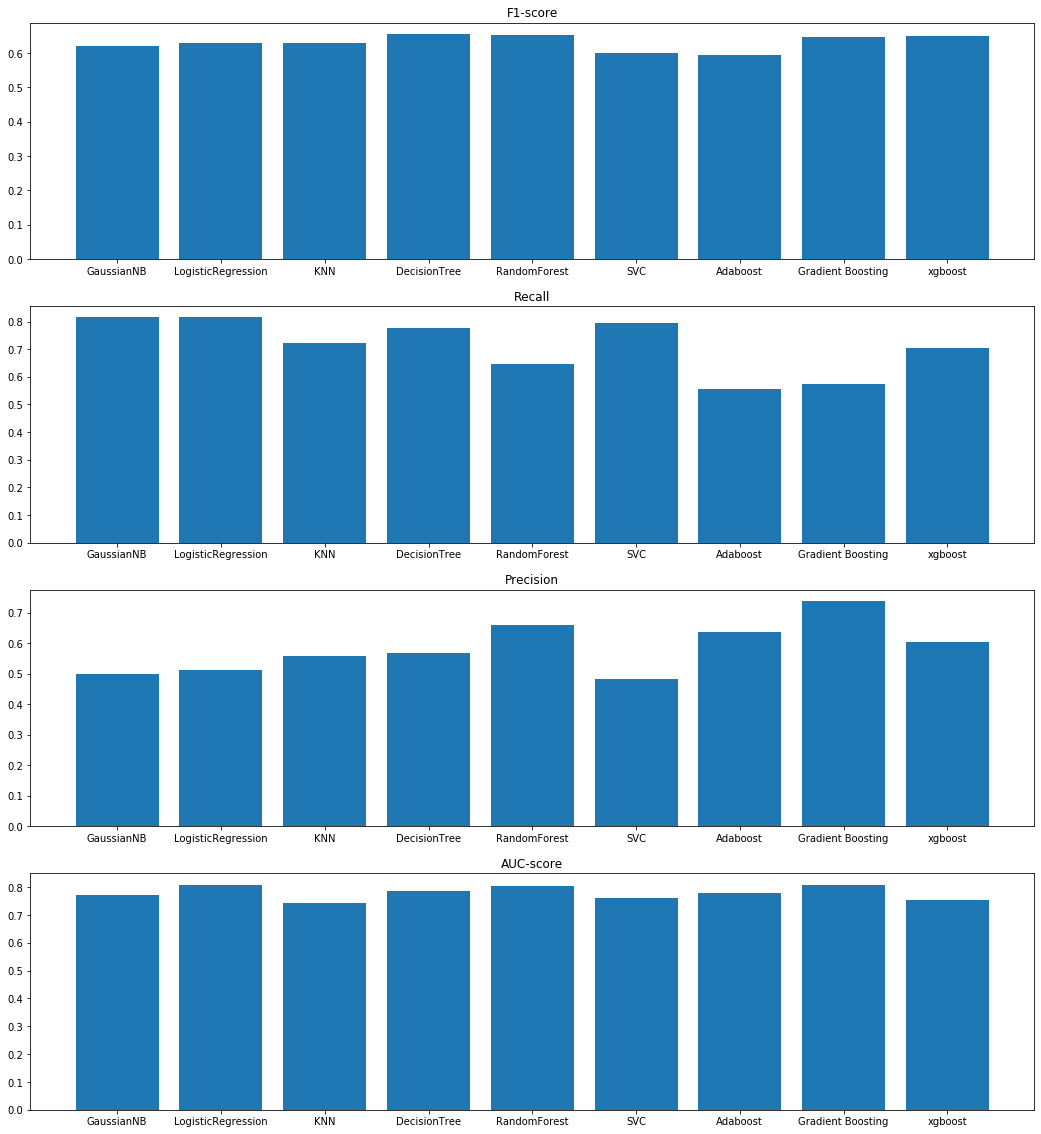

In [54]:
## plot the performance metric scores
fig, ax = plt.subplots(4, 1, figsize=(18, 20))

ax[0].bar(df_models.model, df_models.f1score)
ax[0].set_title('F1-score')

ax[1].bar(df_models.model, df_models.recall)
ax[1].set_title('Recall')

ax[2].bar(df_models.model, df_models.precision)
ax[2].set_title('Precision')

ax[3].bar(df_models.model, df_models.rocauc)
ax[3].set_title('AUC-score')

# Fine-tune figure; make subplots farther from each other, or nearer to each other.
fig.subplots_adjust(hspace=0.2, wspace=0.2)

<IPython.core.display.Javascript object>

<Figure size 720x720 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(0.0, 1.0)

<IPython.core.display.Javascript object>

(0.0, 1.0)

<IPython.core.display.Javascript object>

Text(0.5, 0, 'False Positive Rate')

<IPython.core.display.Javascript object>

Text(0, 0.5, 'True Positive Rate')

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Receiver Operating Characteristic')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

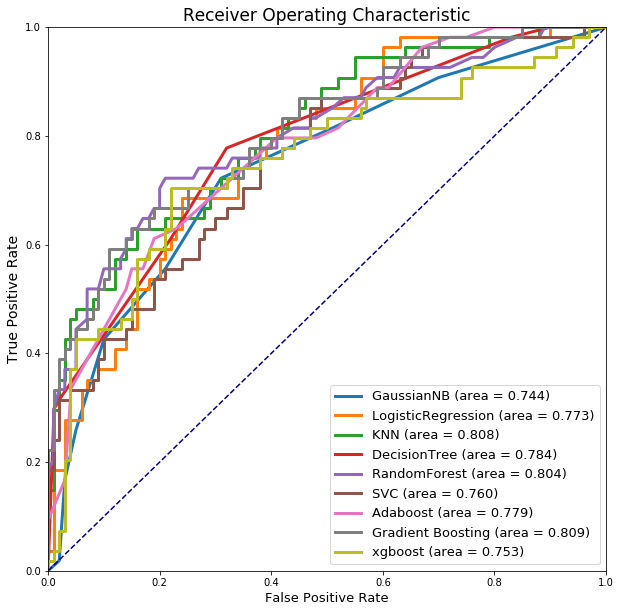

In [55]:
# plot the ROC curves
plt.figure(figsize=(10,10))

model_name = [knn, gnb, logit, decisiontree, randomforest, svc, ada, gbm, xgb_clf]

for i in range(9):
    y_pred = model_name[i].predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, lw=3, label=df_models.model[i] + ' (area = %0.3f)' % auc(fpr, tpr))


plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.show()

In [57]:
def print_score(model, X_train, X_test, y_train, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("Classification Report: \n {}\n".format(classification_report(y_train, model.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, model.predict(X_train))))

        res = cross_val_score(model, X_train, y_train.ravel(), cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("Classification Report: \n {}\n".format(classification_report(y_test, model.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, model.predict(X_test))))    

In [58]:
#print_score(ada, X_train, y_train, X_test, y_test, name, train=True)
print("KNN")
print_score(knn, X_train, X_test, y_train, y_test, train=True)
print_score(knn, X_train, X_test, y_train, y_test, train=False)
print("GaussianNB")
print_score(gnb, X_train, X_test, y_train, y_test, train=True)
print_score(gnb, X_train, X_test, y_train, y_test, train=False)
print("Logistic Regression")
print_score(logit, X_train, X_test, y_train, y_test, train=True)
print_score(logit, X_train, X_test, y_train, y_test, train=False)
print("Decision Trees")
print_score(decisiontree, X_train, X_test, y_train, y_test, train=True)
print_score(decisiontree, X_train, X_test, y_train, y_test, train=False)
print("Random Forest")
print_score(randomforest, X_train, X_test, y_train, y_test, train=True)
print_score(randomforest, X_train, X_test, y_train, y_test, train=False)
print("SVC")
print_score(svc, X_train, X_test, y_train, y_test, train=True)
print_score(svc, X_train, X_test, y_train, y_test, train=False)
print("AdaBoost")
print_score(ada, X_train, X_test, y_train, y_test, train=True)
print_score(ada, X_train, X_test, y_train, y_test, train=False)
print("Gradient Boosting")
print_score(gbm, X_train, X_test, y_train, y_test, train=True)
print_score(gbm, X_train, X_test, y_train, y_test, train=False)
print("xgboost")
print_score(xgb_clf, X_train, X_test, y_train, y_test, train=True)
print_score(xgb_clf, X_train, X_test, y_train, y_test, train=False)

KNN
Train Result:

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.92      0.86       400
           1       0.79      0.58      0.67       214

    accuracy                           0.80       614
   macro avg       0.80      0.75      0.76       614
weighted avg       0.80      0.80      0.79       614


Confusion Matrix: 
 [[366  34]
 [ 89 125]]



<IPython.core.display.Javascript object>

Average Accuracy: 	 0.7608


<IPython.core.display.Javascript object>

Accuracy SD: 		 0.0507
Test Result:

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.90      0.81       100
           1       0.70      0.43      0.53        54

    accuracy                           0.73       154
   macro avg       0.72      0.66      0.67       154
weighted avg       0.73      0.73      0.71       154


Confusion Matrix: 
 [[90 10]
 [31 23]]

GaussianNB
Train Result:

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       400
           1       0.67      0.63      0.65       214

    accuracy                           0.76       614
   macro avg       0.74      0.73      0.73       614
weighted avg       0.76      0.76      0.76       614


Confusion Matrix: 
 [[332  68]
 [ 79 135]]



<IPython.core.display.Javascript object>

Average Accuracy: 	 0.7558


<IPython.core.display.Javascript object>

Accuracy SD: 		 0.0516
Test Result:

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.64      0.52      0.57        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154


Confusion Matrix: 
 [[84 16]
 [26 28]]

Logistic Regression
Train Result:

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       400
           1       0.74      0.59      0.66       214

    accuracy                           0.79       614
   macro avg       0.77      0.74      0.75       614
weighted avg       0.78      0.79      0.78       614


Confusion Matrix: 
 [[356  44]
 [ 87 127]]



<IPython.core.display.Javascript object>

Average Accuracy: 	 0.7671


<IPython.core.display.Javascript object>

Accuracy SD: 		 0.0349
Test Result:

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.70      0.52      0.60        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154


Confusion Matrix: 
 [[88 12]
 [26 28]]

Decision Trees
Train Result:

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.78      0.81       400
           1       0.64      0.73      0.68       214

    accuracy                           0.76       614
   macro avg       0.74      0.76      0.75       614
weighted avg       0.77      0.76      0.77       614


Confusion Matrix: 
 [[312  88]
 [ 57 157]]



<IPython.core.display.Javascript object>

Average Accuracy: 	 0.7263


<IPython.core.display.Javascript object>

Accuracy SD: 		 0.0457
Test Result:

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.78      0.78       100
           1       0.60      0.61      0.61        54

    accuracy                           0.72       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.72      0.72       154


Confusion Matrix: 
 [[78 22]
 [21 33]]

Random Forest
Train Result:

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614


Confusion Matrix: 
 [[400   0]
 [  0 214]]



<IPython.core.display.Javascript object>

Average Accuracy: 	 0.7396


<IPython.core.display.Javascript object>

Accuracy SD: 		 0.0286
Test Result:

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154


Confusion Matrix: 
 [[91  9]
 [26 28]]

SVC
Train Result:

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.90      0.83       400
           1       0.73      0.52      0.61       214

    accuracy                           0.77       614
   macro avg       0.75      0.71      0.72       614
weighted avg       0.76      0.77      0.75       614


Confusion Matrix: 
 [[358  42]
 [102 112]]



<IPython.core.display.Javascript object>

Average Accuracy: 	 0.7492


<IPython.core.display.Javascript object>

Accuracy SD: 		 0.0436
Test Result:

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.89      0.81       100
           1       0.68      0.43      0.52        54

    accuracy                           0.73       154
   macro avg       0.71      0.66      0.67       154
weighted avg       0.72      0.73      0.71       154


Confusion Matrix: 
 [[89 11]
 [31 23]]

AdaBoost
Train Result:

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       400
           1       0.68      0.64      0.66       214

    accuracy                           0.77       614
   macro avg       0.74      0.74      0.74       614
weighted avg       0.76      0.77      0.77       614


Confusion Matrix: 
 [[335  65]
 [ 78 136]]



<IPython.core.display.Javascript object>

Average Accuracy: 	 0.7314


<IPython.core.display.Javascript object>

Accuracy SD: 		 0.0562
Test Result:

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       100
           1       0.64      0.56      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.73      0.73       154


Confusion Matrix: 
 [[83 17]
 [24 30]]

Gradient Boosting
Train Result:

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       400
           1       0.90      0.90      0.90       214

    accuracy                           0.93       614
   macro avg       0.92      0.92      0.92       614
weighted avg       0.93      0.93      0.93       614


Confusion Matrix: 
 [[379  21]
 [ 22 192]]



<IPython.core.display.Javascript object>

Average Accuracy: 	 0.7493


<IPython.core.display.Javascript object>

Accuracy SD: 		 0.0387
Test Result:

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.74      0.57      0.65        54

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.78      0.77       154


Confusion Matrix: 
 [[89 11]
 [23 31]]

xgboost
Train Result:

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614


Confusion Matrix: 
 [[400   0]
 [  0 214]]



<IPython.core.display.Javascript object>

Average Accuracy: 	 0.7380


<IPython.core.display.Javascript object>

Accuracy SD: 		 0.0509
Test Result:

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.85      0.79       100
           1       0.62      0.46      0.53        54

    accuracy                           0.71       154
   macro avg       0.69      0.66      0.66       154
weighted avg       0.70      0.71      0.70       154


Confusion Matrix: 
 [[85 15]
 [29 25]]



Since we want a model which gives best recall to minimize the type 2 error, Gaussian NB and Logistic regression seem to be the apt choices

LogisticRegression accuracy score is
Training: 78.66%
Test set: 75.32%

Optimal threshold 0.2
Precision: 0.5116,   Recall: 0.8148,   F1 Score: 0.6286
LogisticRegression AUC: 0.8080
    

GaussianNB accuracy score is
Training: 76.06%
Test set: 72.73%

Optimal threshold 0.1
Precision: 0.5000,   Recall: 0.8148,   F1 Score: 0.6197
GaussianNB AUC: 0.7731